In [57]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [151]:
url = "https://covidlive.com.au/report/daily-cases/tas"
url

'https://covidlive.com.au/report/daily-cases/tas'

In [167]:
df = pd.read_html(url, header=0)
df[1]

,DATE,NEW,CASES,VAR,NET
0,05 Feb 22,26556,2704275,NaN,26532
1,04 Feb 22,32213,2677743,NaN,32138
2,03 Feb 22,37206,2645605,NaN,33384
3,02 Feb 22,40090,2612221,NaN,40659
4,01 Feb 22,35198,2571562,NaN,33931
...,...,...,...,...,...
738,29 Jan 20,4,9,NaN,4
739,28 Jan 20,0,5,NaN,0
740,27 Jan 20,1,5,NaN,1
741,26 Jan 20,0,4,NaN,0


In [153]:
# Count the number of tables
len(df)

2

In [154]:
#Select second table with case data
NSW = df[1]
NSW

,DATE,NEW,CASES,VAR,NET
0,05 Feb 22,483.0,30788,NaN,471
1,04 Feb 22,570.0,30317,NaN,565
2,03 Feb 22,656.0,29752,NaN,600
3,02 Feb 22,666.0,29152,NaN,661
4,01 Feb 22,699.0,28491,NaN,-1010
...,...,...,...,...,...
738,29 Jan 20,0.0,0,NaN,0
739,28 Jan 20,0.0,0,NaN,0
740,27 Jan 20,0.0,0,NaN,0
741,26 Jan 20,0.0,0,NaN,0


In [155]:
# Fill in any NA's with a 0
NSW.NEW = NSW.NEW.fillna(0)
# Convert the date to a python format
NSW.DATE = pd.to_datetime(NSW.DATE, format='%d %b %y')

#create a new dataframe with just the two columns of interest
df_NSW = pd.concat([NSW.DATE, NSW.NEW, NSW.CASES],axis='columns')
df_NSW

,DATE,NEW,CASES
0,2022-02-05,483.0,30788
1,2022-02-04,570.0,30317
2,2022-02-03,656.0,29752
3,2022-02-02,666.0,29152
4,2022-02-01,699.0,28491
...,...,...,...
738,2020-01-29,0.0,0
739,2020-01-28,0.0,0
740,2020-01-27,0.0,0
741,2020-01-26,0.0,0


In [225]:
plt.rcParams['figure.figsize'] = [15, 5]
df = df_NSW[:200]
df

,DATE,NEW,CASES
0,2022-02-05,483.0,30788
1,2022-02-04,570.0,30317
2,2022-02-03,656.0,29752
3,2022-02-02,666.0,29152
4,2022-02-01,699.0,28491
...,...,...,...
195,2021-07-25,0.0,234
196,2021-07-24,0.0,234
197,2021-07-23,0.0,234
198,2021-07-22,0.0,234


Text(0, 0.5, 'Cases')

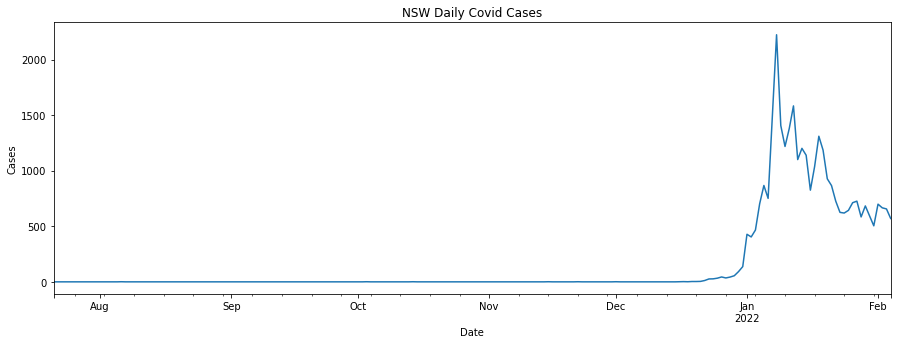

In [157]:
df[1:200].plot(x='DATE', y='NEW', legend=None)
plt.title('NSW Daily Covid Cases')
plt.xlabel('Date')
plt.ylabel('Cases')

Text(0, 0.5, 'Cases')

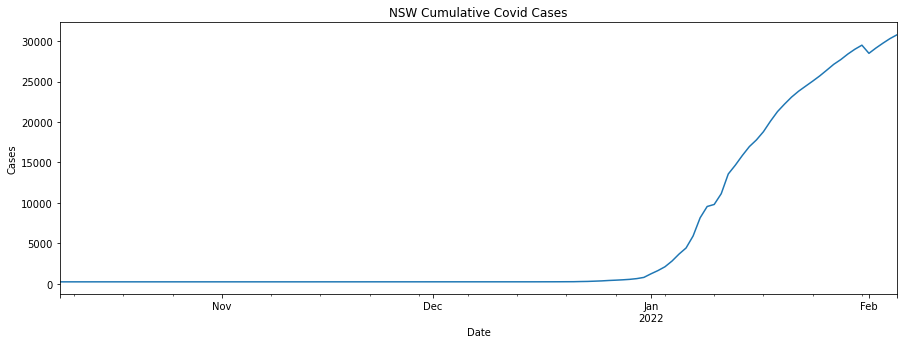

In [158]:
df_NSW[:120].plot(x='DATE', y='CASES', legend=None)
plt.title('NSW Cumulative Covid Cases')
#plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Cases')

In [223]:
#automate gathering data for each state

states = ['nsw', 'vic', 'qld','tas', 'sa', 'nt', 'wa', 'act', 'aus']
url_link = 'https://covidlive.com.au/report/daily-cases/{}'

for state in states:
  url = url_link.format(state) 
  print(url)
    

https://covidlive.com.au/report/daily-cases/nsw
https://covidlive.com.au/report/daily-cases/vic
https://covidlive.com.au/report/daily-cases/qld
https://covidlive.com.au/report/daily-cases/tas
https://covidlive.com.au/report/daily-cases/sa
https://covidlive.com.au/report/daily-cases/nt
https://covidlive.com.au/report/daily-cases/wa
https://covidlive.com.au/report/daily-cases/act
https://covidlive.com.au/report/daily-cases/aus


In [168]:
url2 = "https://covidlive.com.au/report/daily-hospitalised/nsw"
url2

'https://covidlive.com.au/report/daily-hospitalised/nsw'

In [179]:
hosp = pd.read_html(url2, header=0)
hosp = hosp[1]
# Fill in any NA's with a 0
hosp.HOSP = NSW.NEW.fillna(0)
# Convert the date to a python format
hosp.DATE = pd.to_datetime(hosp.DATE, format='%d %b %y')

<AxesSubplot:xlabel='DATE'>

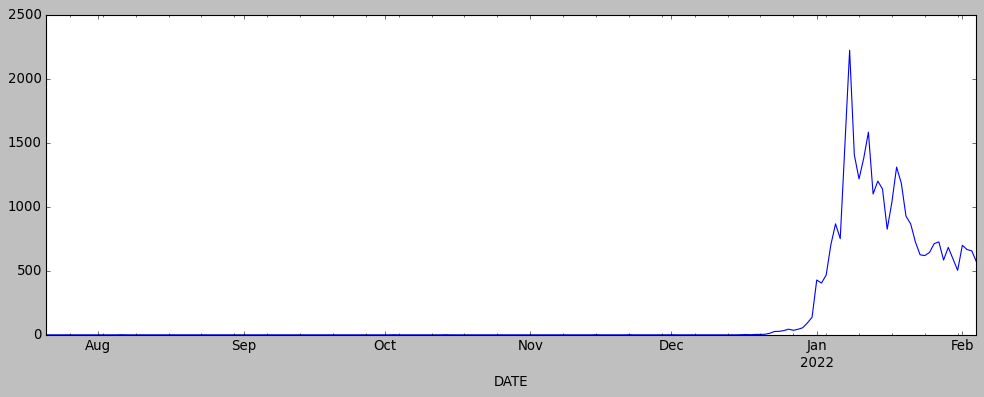

In [226]:
hosp[1:200].plot(x='DATE', y='HOSP', legend=None)

In [177]:
hosp


[                   COVID LIVE         43.5%        11.7K  152
 0  Last updated 8 minutes ago  3rd Dose 16+  Cases 7d Av  ICU,
           DATE    HOSP  ICU  VENT
 0    05 Feb 22  2337.0  152    70
 1    04 Feb 22  2494.0  160    75
 2    03 Feb 22  2578.0  160    68
 3    02 Feb 22  2623.0  170    72
 4    01 Feb 22  2749.0  186    70
 ..         ...     ...  ...   ...
 671  05 Apr 20   118.0   39    23
 672  04 Apr 20     NaN   41    23
 673  03 Apr 20     NaN   42    22
 674  02 Apr 20     NaN   43    20
 675  01 Apr 20     NaN   42    22
 
 [676 rows x 4 columns]]

In [184]:
url3 = "https://covidlive.com.au/report/daily-deaths/nsw"
url3



'https://covidlive.com.au/report/daily-deaths/nsw'

#2 Path to Paper
https://msan.gouvernement.lu/dam-assets/covid-19/graph/Description-reproduction-numbers.pdf

In [197]:
deaths = pd.read_html(url3, header=0)
deaths = deaths[1]
# Fill in any NA's with a 0
deaths.DEATHS = deaths.DEATHS.fillna(0)
# Convert the date to a python format
deaths.DATE = pd.to_datetime(deaths.DATE, format='%d %b %y')

,DATE,DEATHS,VAR,NET
0,05 Feb 22,1536,NaN,18
1,04 Feb 22,1518,NaN,31
2,03 Feb 22,1487,NaN,38
3,02 Feb 22,1449,NaN,27
4,01 Feb 22,1422,NaN,30
...,...,...,...,...
702,05 Mar 20,1,NaN,0
703,04 Mar 20,1,NaN,0
704,03 Mar 20,1,NaN,1
705,02 Mar 20,0,NaN,0


<AxesSubplot:xlabel='DATE'>

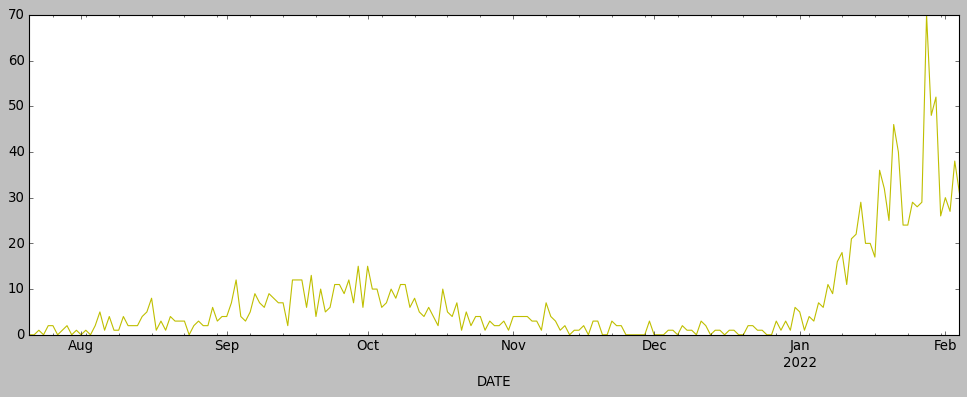

In [230]:
deaths[1:200].plot(x='DATE', y='NET', legend=None, style='y')

In [222]:
X = NSW.DATES

AttributeError: 'DataFrame' object has no attribute 'DATES'